In [1]:
import folium
import os
import numpy as np
from folium.plugins import HeatMap
%matplotlib inline
import time
from numpy import newaxis 
from numpy import shape
import pandas as pd
import matplotlib.pyplot as plt
from netCDF4 import Dataset
from skimage.measure import block_reduce
import math

In [2]:
import ease2conv

In [6]:
path = os.getcwd()
path

'/Users/williamnorris/Team_GISProg'

In [8]:
# Prep the data!
os.chdir(path + "/data/concatenated")
filename_19H = "all_days_2015_19H_F19.nc"
fid_19H = Dataset(filename_19H, "r", format = "NETCDF4")

filename = "all_days_2015_37H_F19.nc"
fid_37H = Dataset( filename, "r", format="NETCDF4")

x = fid_19H.variables['x'][:]
y = fid_19H.variables['y'][:]

tb_19H_long = fid_19H.variables['TB'][:]
tb_37H_long = fid_37H.variables['TB'][:]

tb_37H_long = block_reduce(tb_37H_long, block_size = (1,2,2), func = np.mean)

swe_long_f19 = tb_19H_long - tb_37H_long 

In [9]:
os.chdir(path)

In [10]:
lats = np.zeros((len(y), len(x)), dtype=np.float64)
lons = np.zeros((len(y), len(x)), dtype=np.float64)
grid = ease2conv.Ease2Transform(gridname=fid_19H.variables["crs"].long_name)
for i, xi in enumerate(x):
    for j, yj in enumerate(y):
        row, col = grid.map_to_grid(xi, yj)
        lat, lon = grid.grid_to_geographic(row, col)
        lats[j, i] = lat
        lons[j, i] = lon

In [11]:
new_swe = swe_long_f19[1,:,:]

In [12]:
df = pd.DataFrame(columns = ['lat', 'lon', 'swe'])
for i in range(94):
    for j in range(244):
        df = df.append({'lat': lats[i][j], 'lon': lons[i][j], 'swe':new_swe[i][j]}, ignore_index = True)

In [13]:
df.to_csv('swe_csv')

In [14]:
data = (np.random.normal(size=(100, 3)) *
        np.array([[1, 1, 1]]) +
        np.array([[60, -140, 1]])).tolist()

In [15]:
data = swe_long_f19[0,:,:]

snow_data = [[row['lat'], row['lon']] for index, row in df.iterrows()]

In [16]:
snow_data

[[62.29560457700692, -140.21688903183446],
 [62.33252636583585, -140.306876322266],
 [62.36937514998302, -140.39709884023657],
 [62.40615067779288, -140.48755706009123],
 [62.442852696702424, -140.5782514539567],
 [62.47948095324202, -140.66918249169407],
 [62.51603519303626, -140.76035064085127],
 [62.55251516080497, -140.85175636661498],
 [62.588920600364254, -140.9434001317624],
 [62.62525125462754, -141.03528239661225],
 [62.66150686560682, -141.1274036189754],
 [62.697687174413886, -141.21976425410537],
 [62.733791921261535, -141.31236475464803],
 [62.76982084546512, -141.40520557059102],
 [62.80577368544383, -141.4982871492128],
 [62.84165017872242, -141.59160993503116],
 [62.87745006193268, -141.68517436975134],
 [62.913173070815056, -141.7789808922138],
 [62.94881894022063, -141.87302993834146],
 [62.984387404112745, -141.96732194108634],
 [63.01987819556901, -142.0618573303763],
 [63.055291046783246, -142.15663653306086],
 [63.090625689067686, -142.25165997285654],
 [63.125881

In [17]:
data = data.tolist()

In [18]:
m = folium.Map(location = [67, -154.17])
#data = swe_long_f19[0,:,:]
HeatMap(snow_data).add_to(m)
m

In [19]:
swe_image = swe_long_f19[1,:,:]
np.shape(swe_image)

(94, 244)

In [20]:
x = []
y = []
z = []
for i in range(94):
    for j in range(244):
        x.append(i)
        y.append(j)
        z.append(swe_image[i,j])



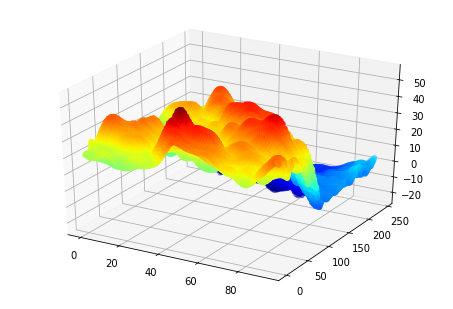

In [21]:
from mpl_toolkits.mplot3d.axes3d import *
from matplotlib.pyplot import cm
fig = plt.figure()
ax = Axes3D(fig)
ax.scatter3D(x,y,z, c = z, cmap = plt.cm.jet)
plt.show()

In [22]:
import plotly.plotly as py
import plotly.graph_objs as go

ModuleNotFoundError: No module named 'plotly'

In [23]:
trace1 = go.Scatter3d(
    x = x, 
    y = y,
    z = z,
    mode = 'markers',
    marker = dict(
        size = 12,
        color = z,
        colorscale = 'jet_r',
        opacity = 0.8))
data = [trace1]
layout = go.Layout(
    margin = dict(
        l = 0,
        r = 0,
        b = 0,
        t = 0))
fig = go.Figure(data = data, layout = layout)
py.iplot(fig, filename = '3d_map')

NameError: name 'go' is not defined

In [67]:
trace = go.Mesh3d(x=x,y=y,z=z,color=z, 
                  opacity=0.50,
                  colorscale = [['0', 'rgb(255, 0, 0)'], 
                      ['0.5', 'rgb(0, 255, 0)'], 
                      ['1', 'rgb(0, 0, 255)']],
                  showscale = True)



py.iplot([trace])

In [24]:
from mapboxgl.utils import *
from mapboxgl.viz import *

In [25]:
df_to_geojson(df, filename = 'swe_1day.geojson',
             properties = ['swe'],
             lat = 'lat', lon = 'lon')

{'type': 'file', 'filename': 'swe_1day.geojson', 'feature_count': 22936}

In [26]:
token = "pk.eyJ1Ijoid2lubzY2ODciLCJhIjoiY2pmNzc5anFrMXo2djJxcTdtOTZmeXlzZiJ9.9dFZpHA2LHGv-R2R3ydnaQ"


In [27]:
measure = 'swe'
heatmap_color_stops = create_color_stops([0.01, 0.25, 0.5, 0.75, 1], colors='RdPu')
heatmap_radius_stops = [[0,.5], [25, 30]] #increase radius with zoom

color_breaks = [round(df[measure].quantile(q=x*0.1), 2) for x in range(2,10)]
color_stops = create_color_stops(color_breaks, colors='Spectral')

heatmap_weight_stops = create_weight_stops(color_breaks)

#Create a heatmap 
viz3 = HeatmapViz('swe_1day.geojson', 
                  access_token=token,
                  weight_property = 'swe',
                  weight_stops = heatmap_weight_stops,
                  color_stops = heatmap_color_stops,
                  radius_stops = heatmap_radius_stops,
                  opacity = 0.9,
                  center = (-154, 67),
                  zoom = 3.5,
                  below_layer='waterway-label'
                 )

viz3.label_property = 'swe'

viz3.show()

In [28]:
heatmap_weight_stops

[[-1.78, 0.0],
 [14.48, 0.12],
 [19.08, 0.25],
 [22.6, 0.38],
 [26.01, 0.5],
 [29.04, 0.62],
 [32.12, 0.75],
 [36.07, 0.88]]

In [29]:
heatmap_weight_stops

[[-1.78, 0.0],
 [14.48, 0.12],
 [19.08, 0.25],
 [22.6, 0.38],
 [26.01, 0.5],
 [29.04, 0.62],
 [32.12, 0.75],
 [36.07, 0.88]]

In [30]:
# Generate data breaks using numpy quantiles and color stops from colorBrewer
measure = 'swe'
color_breaks = [round(df[measure].quantile(q=x*0.1), 2) for x in range(1,9)]
color_stops = create_color_stops(color_breaks, colors='YlGnBu')

# Create the viz from the dataframe
viz = CircleViz('swe_1day.geojson',
                access_token=token, 
                color_property = "swe",
                color_stops = color_stops,
                center = (-154, 67),
                zoom = 3,
                below_layer = 'waterway-label')

viz.show()